In [1]:
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import json

In [2]:

dataset = pd.read_csv("dataset.csv")
dataset

,label,author,comment,id,channel,title
0,1,Abatistalima-b4t,"AЕR𝐎𝟴𝟴 gua main dikit aja, saldo lngsg nambah",CIUnp8NMw8w,Deddy Corbuzier,TERNYATA ARAFAH PERNAH PACARAN SAMA ATE‼️😅 - P...
1,1,AbdulkadirMustafa-z4t,Sebelumnya bermain di tempat lain terasa kuran...,CIUnp8NMw8w,Deddy Corbuzier,TERNYATA ARAFAH PERNAH PACARAN SAMA ATE‼️😅 - P...
2,1,abdullaGodgift-m1w,AЕR𝐎𝟴𝟴 aku sih gmpang bgt dapet WEDEY gede dsini,CIUnp8NMw8w,Deddy Corbuzier,TERNYATA ARAFAH PERNAH PACARAN SAMA ATE‼️😅 - P...
3,1,AbdullahFABIAN-i2m,"AЕR𝐎𝟴𝟴 gua cba bentar, eh lgnsung dapet jackpot",CIUnp8NMw8w,Deddy Corbuzier,TERNYATA ARAFAH PERNAH PACARAN SAMA ATE‼️😅 - P...
4,1,Abergerontorres-s3d,"AЕR𝐎𝟴𝟴 aku cba maen, malah jackpot gede",CIUnp8NMw8w,Deddy Corbuzier,TERNYATA ARAFAH PERNAH PACARAN SAMA ATE‼️😅 - P...
...,...,...,...,...,...,...
20802,0,HolleSangma,gua udah 5tahun main di alexis17. jangka pan...,sck5d_eDT30,Jonathan Liandi,Review Skin Collector Melissa - Mobile Legends
20803,0,Jigen287,Kita butuh impaction,sck5d_eDT30,Jonathan Liandi,Review Skin Collector Melissa - Mobile Legends
20804,0,mirzarayyan5423,"Cih, masih epigh",sck5d_eDT30,Jonathan Liandi,Review Skin Collector Melissa - Mobile Legends
20805,0,jayyjoo15,SKIN GARA UDAH KELIATAN BANGG,sck5d_eDT30,Jonathan Liandi,Review Skin Collector Melissa - Mobile Legends


In [3]:
df = pd.DataFrame(dataset['comment'])

In [4]:
from transformers import GPT2Tokenizer
from sklearn.model_selection import train_test_split

# Loading the dataset to train our model
dataset = pd.read_csv("dataset.csv")

# Split the dataset into train and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Initialize tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

# Modified tokenize function
def tokenize_function(text):
    return tokenizer(
        text,
        padding="max_length",
        truncation=True,
        max_length=128,  
        return_tensors="pt"
    )

# Apply tokenization to both train and test sets
train_tokenized = train_data['comment'].apply(tokenize_function)
test_tokenized = test_data['comment'].apply(tokenize_function)


c:\Users\MULTIMEDIA IF\anaconda3\envs\llm_security\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from transformers import GPT2ForSequenceClassification

model = GPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=2)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
# # Using Gemma
# from transformers import GemmaForSequenceClassification, GemmaTokenizer

# tokenizer = GemmaTokenizer.from_pretrained("google/gemma-2b")
# model = GemmaForSequenceClassification.from_pretrained("google/gemma-2b", num_labels=2)

# # Or using BERT
# from transformers import BertTokenizer, BertForSequenceClassification

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# # Or using RoBERTa
# from transformers import RobertaTokenizer, RobertaForSequenceClassification

# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
# model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# # Or using DeBERTa
# from transformers import DebertaTokenizer, DebertaForSequenceClassification

# tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')
# model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=2)

In [7]:
import evaluate
import numpy as np

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [8]:

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device
model.to(device)

GPT2ForSequenceClassification(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (score): Linear(in_features=768, out_features=2, bias=False)
)

In [9]:
from transformers import TrainingArguments, Trainer
from torch.utils.data import Dataset

# Create a custom dataset class
class CommentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        # Remove the batch dimension the tokenizer adds
        item = {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': label
        }
        
        return item

# Create dataset instances
train_dataset = CommentDataset(
    train_data['comment'], 
    train_data['label'],
    tokenizer
)

eval_dataset = CommentDataset(
    test_data['comment'],
    test_data['label'],
    tokenizer
)

# Training arguments and trainer setup
training_args = TrainingArguments(
    output_dir="test_trainer",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=4,
    num_train_epochs=2,
    logging_dir="./logs",
    logging_steps=1,
    # Remove unsupported arguments for older transformers versions
    # logging_strategy="epoch",
    # evaluation_strategy="epoch",
    # save_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Step,Training Loss
1,0.677300
2,1.273700
3,0.946600
4,0.838900
5,0.404900
6,1.060800
7,0.521300
8,0.595800
9,0.381200
10,0.589700


TrainOutput(global_step=8324, training_loss=0.1963152593326242, metrics={'train_runtime': 1122.778, 'train_samples_per_second': 29.65, 'train_steps_per_second': 7.414, 'total_flos': 2174642206801920.0, 'train_loss': 0.1963152593326242, 'epoch': 2.0})

In [ ]:
import evaluate

trainer.evaluate()

In [ ]:
# Extract train_loss and train_accuracy per epoch from trainer log history
train_loss = []
train_acc = []
epochs = []

for log in trainer.state.log_history:
    if 'loss' in log and 'epoch' in log:
        train_loss.append(log['loss'])
        epochs.append(log['epoch'])
    if 'train_accuracy' in log and 'epoch' in log:
        train_acc.append(log['train_accuracy'])

print("Train Loss per Epoch:", train_loss)
print("Train Accuracy per Epoch:", train_acc)
print("Epochs:", epochs)

In [ ]:
# Hitung rata-rata train_loss dari list train_loss yang sudah diekstrak sebelumnya
if train_loss:
    avg_train_loss = sum(train_loss) / len(train_loss)
    print(f"Rata-rata Train Loss per Epoch: {avg_train_loss:.4f}")
else:
    print("train_loss belum tersedia atau kosong.")

In [ ]:
train_predictions = trainer.predict(train_dataset)
y_train_true = train_predictions.label_ids
y_train_pred = train_predictions.predictions.argmax(axis=-1)
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train_true, y_train_pred)
print("Train Accuracy:", train_acc)

In [11]:
# Save history per epoch to CSV and plot
import pandas as pd
import matplotlib.pyplot as plt

history = trainer.state.log_history
epoch_metrics = []
for log in history:
    print(log)  # Debug: print log to see available keys
    if 'eval_loss' in log and 'eval_accuracy' in log and 'epoch' in log:
        epoch_metrics.append({
            'epoch': log['epoch'],
            'val_loss': log['eval_loss'],
            'val_accuracy': log['eval_accuracy']
        })

metrics_df = pd.DataFrame(epoch_metrics)
print('Kolom DataFrame:', metrics_df.columns.tolist())  # Debug: print columns
metrics_df.to_csv('training_metrics_e1.csv', index=False)

print("\nValidation Metrics per Epoch:")
print(metrics_df.to_string(index=False))

# Pastikan nama kolom benar sebelum plotting
if 'epoch' in metrics_df.columns and 'val_accuracy' in metrics_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_df['epoch'], metrics_df['val_accuracy'], 'bo-', label='Validation Accuracy')
    plt.title('Validation Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.savefig('validation_accuracy.png')
else:
    print('Kolom yang tersedia:', metrics_df.columns.tolist())
    print('Kolom "epoch" atau "val_accuracy" tidak ditemukan. Cek isi DataFrame di atas.')

{'loss': 0.6773, 'grad_norm': 33.76137161254883, 'learning_rate': 5e-05, 'epoch': 0.00024031240612796637, 'step': 1}
{'loss': 1.2737, 'grad_norm': 208.77772521972656, 'learning_rate': 4.999399327246516e-05, 'epoch': 0.00048062481225593273, 'step': 2}
{'loss': 0.9466, 'grad_norm': 67.31949615478516, 'learning_rate': 4.9987986544930324e-05, 'epoch': 0.000720937218383899, 'step': 3}
{'loss': 0.8389, 'grad_norm': 47.63709259033203, 'learning_rate': 4.998197981739549e-05, 'epoch': 0.0009612496245118655, 'step': 4}
{'loss': 0.4049, 'grad_norm': 23.41695785522461, 'learning_rate': 4.9975973089860645e-05, 'epoch': 0.0012015620306398318, 'step': 5}
{'loss': 1.0608, 'grad_norm': 43.78948974609375, 'learning_rate': 4.996996636232581e-05, 'epoch': 0.001441874436767798, 'step': 6}
{'loss': 0.5213, 'grad_norm': 19.203105926513672, 'learning_rate': 4.9963959634790966e-05, 'epoch': 0.0016821868428957645, 'step': 7}
{'loss': 0.5958, 'grad_norm': 139.10166931152344, 'learning_rate': 4.995795290725613e-0

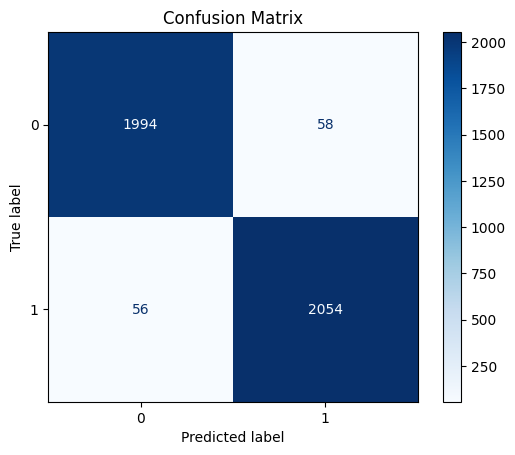

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on the test set
predictions = trainer.predict(eval_dataset)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(axis=-1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

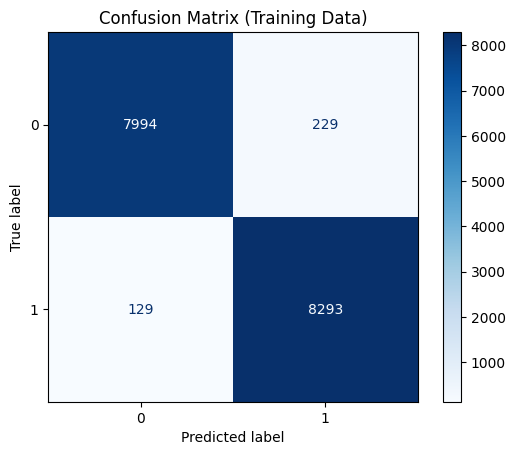

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions on the training set
train_predictions = trainer.predict(train_dataset)
y_train_true = train_predictions.label_ids
y_train_pred = train_predictions.predictions.argmax(axis=-1)

# Compute confusion matrix for training data
cm_train = confusion_matrix(y_train_true, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Blues')
plt.title('Confusion Matrix (Training Data)')
plt.show()

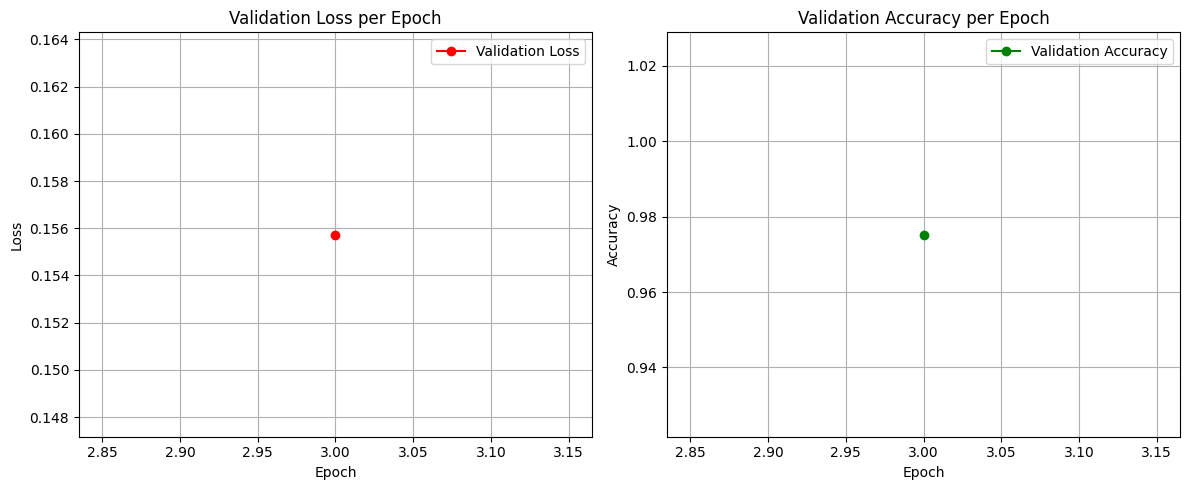

In [20]:
# Visualisasi hasil evaluasi: loss dan akurasi per epoch
import matplotlib.pyplot as plt

# Ambil log history dari trainer
history = trainer.state.log_history

# Ekstrak eval_loss dan eval_accuracy per epoch
eval_loss = []
eval_acc = []
epochs = []

for log in history:
    if 'eval_loss' in log and 'eval_accuracy' in log and 'epoch' in log:
        eval_loss.append(log['eval_loss'])
        eval_acc.append(log['eval_accuracy'])
        epochs.append(log['epoch'])

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, eval_loss, 'r-o', label='Validation Loss')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, eval_acc, 'g-o', label='Validation Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save_pretrained("saved_model2")
tokenizer.save_pretrained("saved_model2")

('saved_model\\tokenizer_config.json',
 'saved_model\\special_tokens_map.json',
 'saved_model\\vocab.json',
 'saved_model\\merges.txt',
 'saved_model\\added_tokens.json')

In [ ]:
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer
import torch

# Load model and tokenizer from saved directory
model_loaded = GPT2ForSequenceClassification.from_pretrained("saved_model2")
tokenizer_loaded = GPT2Tokenizer.from_pretrained("saved_model2")
model_loaded.to(device)
model_loaded.eval()

def predict_comment(comment_text):
    inputs = tokenizer_loaded(
        comment_text,
        padding="max_length",
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model_loaded(**inputs)
        logits = outputs.logits
        pred = torch.argmax(logits, dim=-1).item()
    return pred

# Example usage:
test_comment = "Main di BIBIT288 seru abis! Bonusnya mantap!"
result = predict_comment(test_comment)

if result == 1:
    print("komentar ini adalah judi online.")
else:
    print("komentar ini bukan judi online.")

komentar ini adalah judi online.
